<function matplotlib.pyplot.show(close=None, block=None)>

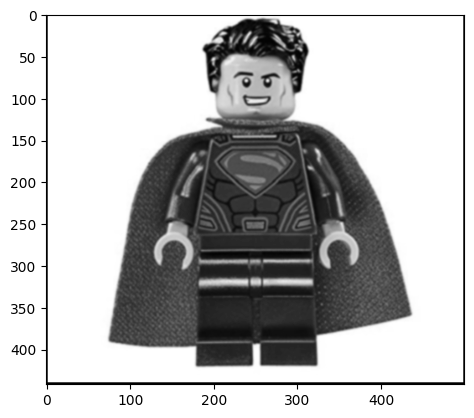

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import another_tester as at
superman = plt.imread(
    'C:\\Users\\ezmos\\OneDrive - Indiana University\\My Courses\\Fall 2023\\INFO-I 399\\Anna Help\\Final Assignment\\imgs\\superman.jpg')

grey_superman = at.make_gray(superman)
blur_superman = at.apply_gaussian_filter(grey_superman)
plt.imshow(blur_superman, cmap='gray')
plt.show

In [110]:
def upsample(image: np.ndarray[np.uint8]):
    height, width = image.shape
    upsampled = np.zeros((height*2, width*2))
    upsampled[::2, ::2] = image

    # upsampled_image = upsample(subsampled_image())
    # plt.imshow(upsampled_image)
    # plt.show()
    
    #This section is technically wrong, I just don't know how to do it right,
    #These values need to be averaged out with the values above and below them after computing the middle layer
    left_bias_pixels = upsampled[::2, :-2:2]
    right_bias_pixels = upsampled[::2, 2::2]
    # close_pixel_gaps = upsampled[::2, 1:-1:2] #Reference doesn't work
    upsampled[::2, 1:-1:2] = left_bias_pixels + right_bias_pixels / 2

    top_bias_pixels = upsampled[::2]
    bottom_bias_pixels = upsampled[2:-2:2]
    upsampled[1::2] = top_bias_pixels + bottom_bias_pixels / 2
    upsampled[:, -1] = upsampled[:, -2]
    return upsampled

In [111]:
sample_matrix = np.array(
    [[1, 5, 1],
     [1, 9, 3],
     [1, 4, 1],]
)
# sample_matrix[:, :-1:]
upsample(sample_matrix)

# (sample_matrix + (sample_matrix)/2) / 2

array([[ 1.  ,  3.5 ,  5.  ,  5.5 ,  1.  ,  1.  ],
       [ 1.5 ,  6.25,  9.5 , 10.75,  2.5 ,  2.5 ],
       [ 1.  ,  5.5 ,  9.  , 10.5 ,  3.  ,  3.  ],
       [ 1.5 ,  8.25, 13.5 , 15.75,  4.5 ,  4.5 ],
       [ 1.  ,  3.  ,  4.  ,  4.5 ,  1.  ,  1.  ],
       [ 1.5 ,  5.75,  8.5 ,  9.75,  2.5 ,  2.5 ]])